In [ ]:
import sqlite3

# Passo 1.1: Conectar ao banco de dados
conexao = sqlite3.connect('dados_vendas.db')

# Passo 1.2: Criar um cursor
cursor = conexao.cursor()

# Passo 1.3: Criar uma tabela
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
''')

# Passo 1.4: Inserir os dados fornecidos
cursor.execute('''
INSERT INTO vendas (data_venda, produto, categoria, valor_venda) VALUES
('2024-01-01', 'Balança Eletrônica Sanrio Kitchen', 'Eletrônicos', 337.00),
('2024-01-15', 'Sapatos Casuais Femininos Sanrio', 'Calçados', 243.00),
('2024-02-10', 'Ventilador De Mesa Pequeno Sanrio', 'Eletrônicos', 146.00),
('2024-03-12', 'Botas Martin Sanrio Hellokitty', 'Calçados', 334.00),
('2024-03-20', 'Sandalias Sanrio Hello Kitty', 'Calçados', 106.00),
('2024-04-02', 'Chinelos Sanrio Home Hello Kitty Kuromi', 'Calçados', 93.00),
('2024-04-13', 'Fones De Ouvido Intra-auriculares Sanrio', 'Eletrônicos', 121.00),
('2024-04-14', 'Fones De Ouvido Bluetooth Sanrio', 'Eletrônicos', 215.00),
('2024-05-23', 'Chaveiro Hello Kitty Sakura', 'Acessórios', 35.00),
('2024-05-27', 'Pulseira Com Berloque Pandora Kuromi', 'Acessórios', 41.00),
('2024-06-19', 'Kit Inverno Infantil Hello Kitty Sanrio', 'Roupas', 58.00),
('2024-06-25', 'Camiseta Gótico Rock Kuromi', 'Roupas', 44.00),
('2024-07-11', 'Blusas Curtas Femininas Sanrio', 'Roupas', 129.00),
('2024-07-30', 'Vestido Sanrio Melody', 'Roupas', 193.00);
''')

# Passo 1.5: Confirmar as mudanças
conexao.commit()

In [ ]:
import pandas as pd

# Passo 2: Ler os dados em um DataFrame
df_vendas = pd.read_sql_query("SELECT * FROM vendas", conexao)

# Visualizar os dados
print(df_vendas.head())

   id_venda  data_venda                            produto    categoria  \
0         1  2024-01-01  Balança Eletrônica Sanrio Kitchen  Eletrônicos   
1         2  2024-01-15   Sapatos Casuais Femininos Sanrio     Calçados   
2         3  2024-02-10  Ventilador De Mesa Pequeno Sanrio  Eletrônicos   
3         4  2024-03-12     Botas Martin Sanrio Hellokitty     Calçados   
4         5  2024-03-20       Sandalias Sanrio Hello Kitty     Calçados   

   valor_venda  
0        337.0  
1        243.0  
2        146.0  
3        334.0  
4        106.0  


In [ ]:
# Passo 3: Análise dos dados
# Total de vendas por categoria
total_por_categoria = df_vendas.groupby('categoria')['valor_venda'].sum().reset_index()
print(total_por_categoria)

# Adicionando uma coluna de mês
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])
df_vendas['mes'] = df_vendas['data_venda'].dt.to_period('M')

# Total de vendas por mês
total_por_mes = df_vendas.groupby('mes')['valor_venda'].sum().reset_index()
print(total_por_mes)

     categoria  valor_venda
0   Acessórios         76.0
1     Calçados        776.0
2  Eletrônicos        819.0
3       Roupas        424.0
       mes  valor_venda
0  2024-01        580.0
1  2024-02        146.0
2  2024-03        440.0
3  2024-04        429.0
4  2024-05         76.0
5  2024-06        102.0
6  2024-07        322.0


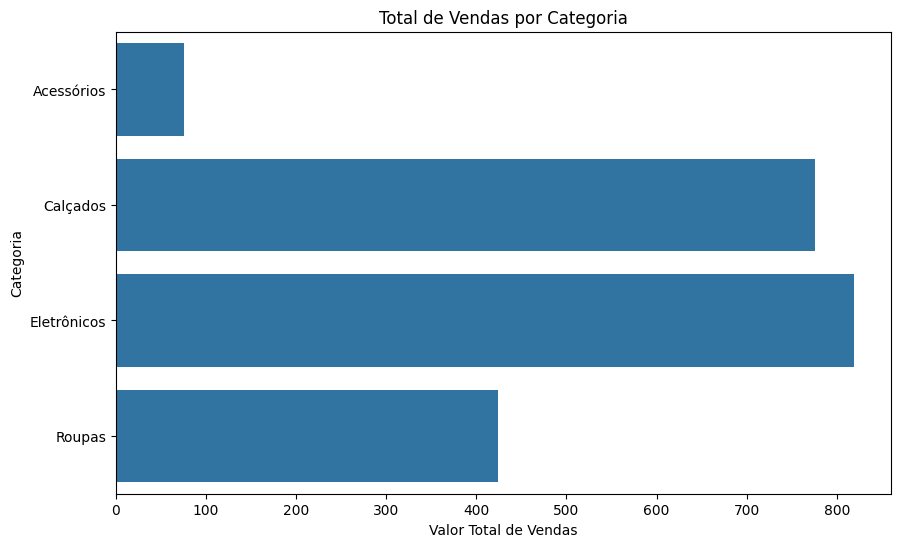

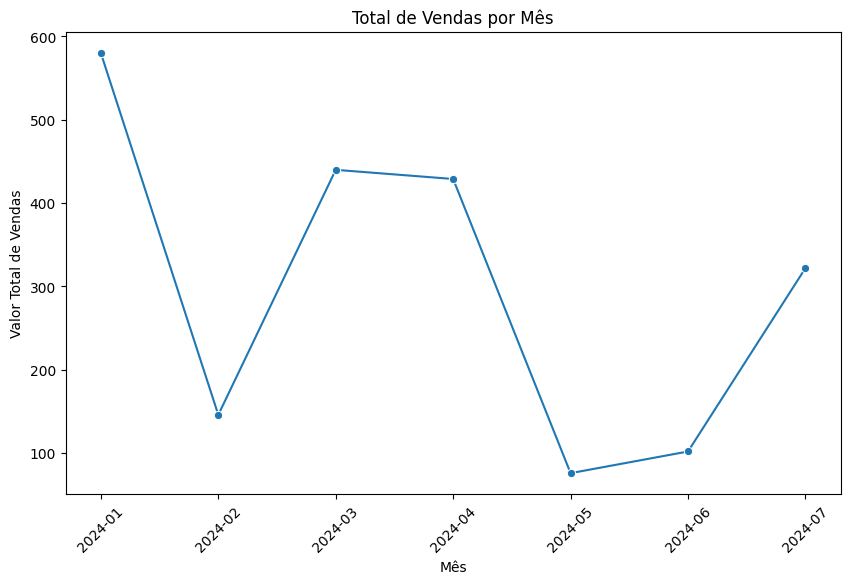

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 4: Visualização dos dados
# Gráfico de total de vendas por categoria
plt.figure(figsize=(10, 6))
sns.barplot(x='valor_venda', y='categoria', data=total_por_categoria)
plt.title('Total de Vendas por Categoria')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('Categoria')
plt.show()

# Gráfico de total de vendas por mês
plt.figure(figsize=(10, 6))
# Convert 'mes' column to string representation
total_por_mes['mes'] = total_por_mes['mes'].astype(str)
sns.lineplot(x='mes', y='valor_venda', data=total_por_mes, marker='o')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Fechar a conexão
conexao.close()